# 🧑‍🎓 Student Version — Solutions Removed
- Use the reflection prompts and hints.
- Your instructor will share solutions separately.

In [322]:
REVEAL_SOLUTIONS = False
print('Solutions are hidden in the Student Version.')

Solutions are hidden in the Student Version.


# Pandas in Google Colab — 2-Hour Hands-On (+ Advanced & Capstone)
**With Reflection Prompts After Each Section**
**Last updated:** 2025-08-15

Run top-to-bottom. Attempt **Exercises**, then write your **✍️ Analysis** under each section.

## 0) Setup & Load the **tips** dataset (10m)

In [323]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)
pd.set_option('display.precision', 3)
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips = pd.read_csv(url); tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [324]:
print("Shape:", tips.shape)
print("\nInfo:"); print(tips.info())
print("\nDescribe:"); display(tips.describe(include='all'))

Shape: (244, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None

Describe:


,total_bill,tip,sex,smoker,day,time,size
count,244.000,244.000,244,244,244,244,244.00
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.57
...,...,...,...,...,...,...,...
min,3.070,1.000,NaN,NaN,NaN,NaN,1.00
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.00
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.00
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.00


**Columns**: `total_bill` (float), `tip` (float), `sex` (str), `smoker` (str), `day` (str), `time` (str), `size` (int)

### ✅ Exercise 0
1) Unique `day`, `time`. 2) Count duplicates. 3) Averages of `total_bill`, `tip`.

**Hints:**
- Concept: inspect levels and duplicates.
- API: `unique`, `duplicated`, `mean`.

In [325]:
# YOUR WORK: Exercise 0
print("Unique days:", tips['day'].unique())
print("Unique times:", tips['time'].unique())

print("Duplicates:", tips.duplicated().sum())

print("Avg total_bill:", tips['total_bill'].mean())
print("Avg tip:", tips['tip'].mean())

Unique days: ['Sun' 'Sat' 'Thur' 'Fri']
Unique times: ['Dinner' 'Lunch']
Duplicates: 1
Avg total_bill: 19.78594262295082
Avg tip: 2.99827868852459


### ✍️ Analysis (Setup & Load) — 3–5 sentences
- What columns and dtypes did you observe? Any surprises?
- Is the dataset balanced across `day` and `time`? Cite one count.
- One risk if you skip an initial audit here.

### 🔎 Quick checks
- Report the shape (rows, cols).
- Name 1 non-numeric dtype and why it matters.

### ➕ Extension (pick one)
- Tweak display options and note the effect.
- Compute `value_counts()` on `day` or `time`.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

### Analysis
- The dataset contains 7 columns with mixed data types including float64, int64, and object dtypes.
- Dataset is not balanced across days - Saturday has way more entries than Friday (87 vs 19)
- Risk of skipping audit: might miss data quality issues like duplicates or wrong dtypes

### Quick checks
- Shape: 244 rows, 7 columns
- 'sex' is object dtype - converting to category would save memory and enable categorical operations

### Extension
tips['day'].value_counts() shows the imbalance clearly

## 1) Import & Core Manipulation (20m)

In [326]:
tips[['total_bill','tip']].head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [327]:
tips.iloc[0:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [328]:
tips.loc[tips['day']=='Sun', ['total_bill','tip','size']].head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [329]:
tips.query("time=='Lunch' and smoker=='Yes'").head()

,total_bill,tip,sex,smoker,day,time,size
80,19.44,3.00,Male,Yes,Thur,Lunch,2
83,32.68,5.00,Male,Yes,Thur,Lunch,2
138,16.00,2.00,Male,Yes,Thur,Lunch,2
191,19.81,4.19,Female,Yes,Thur,Lunch,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2


In [330]:
tips.sort_values(['total_bill','tip'], ascending=[False, True]).head()

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3


In [331]:
tips = tips.assign(tip_pct = tips['tip']/tips['total_bill'],
                         tip_per_person = tips['tip']/tips['size']); tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059,0.505
1,10.34,1.66,Male,No,Sun,Dinner,3,0.161,0.553
2,21.01,3.50,Male,No,Sun,Dinner,3,0.167,1.167
3,23.68,3.31,Male,No,Sun,Dinner,2,0.140,1.655
4,24.59,3.61,Female,No,Sun,Dinner,4,0.147,0.902


### ✅ Exercise 1
Filter `day='Sat' & size≥3`, add `bill_per_person`, sort desc, show top 5.

**Hints:**
- Concept: filter → compute → sort.
- API: boolean mask / `.query`, `.assign`, `.sort_values`.

In [332]:
# YOUR WORK: Exercise 1
sat_large = tips.query("day=='Sat' and size>=3")
sat_large = sat_large.assign(bill_per_person = sat_large['total_bill']/sat_large['size'])
sat_large.sort_values('bill_per_person', ascending=False).head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person,bill_per_person
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.197,3.333,16.937
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056,0.833,14.767
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186,2.250,12.082
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139,1.683,12.068
238,35.83,4.67,Female,No,Sat,Dinner,3,0.130,1.557,11.943


### ✍️ Analysis (Import & Manipulation) — 3–5 sentences
- Which 2 columns seem most associated with `tip`? Support with a stat.
- Explain one filter you wrote in plain English.
- One thing you might compute next.

### 🔎 Quick checks
- Show first 3 rows of your filtered frame.
- Name one new column and its formula.

### ➕ Extension (pick one)
- Rewrite a filter via `.query` vs mask; compare readability.
- Change a sort order and predict effect.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

### Analysis
- total_bill and size seem most associated with tip - larger bills and parties tend to tip more
- Filter selects Saturday records with party size 3 or more for analysis
- Next could compute tip percentage by day to see patterns

### Quick checks
- First 3 rows show Saturday large parties with highest bill per person
- bill_per_person = total_bill / size shows individual cost

### Extension
- Query syntax more readable than boolean masks for complex conditions

## 2) Cleaning & Preprocessing (15m)

In [333]:
tips['sex']=tips['sex'].astype('category')
tips['smoker']=tips['smoker'].astype('category')
tips['day']=tips['day'].astype('category')
tips['time']=tips['time'].astype('category'); tips.dtypes

total_bill         float64
tip                float64
sex               category
smoker            category
day               category
time              category
size                 int64
tip_pct            float64
tip_per_person     float64
dtype: object

In [334]:
tips['server_name'] = [' Alice ', 'Bob', 'ALICE', 'bob', ' Alice ', 'Bob'] * (len(tips)//6) + ['Alice']*(len(tips)%6)
tips['server_name'] = tips['server_name'].str.strip().str.title()
tips['server_name'].head()

0    Alice
1      Bob
2    Alice
3      Bob
4    Alice
Name: server_name, dtype: object

In [335]:
demo = tips.copy()
demo = pd.concat([demo, demo.iloc[0:2]], ignore_index=True)
print("Before:", demo.shape, "After:", demo.drop_duplicates().shape)

Before: (246, 10) After: (243, 10)


### ✅ Exercise 2
1) Ensure `size` is int64. 2) Build `tips_clean` with selected cols. 3) Verify no duplicates.

**Hints:**
- Concept: enforce types, subset columns, dedup.
- API: `.astype`, column lists, `.drop_duplicates`.

In [336]:
# YOUR WORK: Exercise 2
tips['size'] = tips['size'].astype('int64')
print("dtype of size:", tips['size'].dtype)

tips_clean = tips[['total_bill','tip','sex','smoker','day','time','size','tip_pct','tip_per_person','server_name']].copy()
print("Shape before dedup:", tips_clean.shape)
tips_clean = tips_clean.drop_duplicates()
print("Shape after dedup:", tips_clean.shape)
print("Duplicates:", tips_clean.duplicated().sum())

dtype of size: int64
Shape before dedup: (244, 10)
Shape after dedup: (243, 10)
Duplicates: 0


### ✍️ Analysis (Cleaning & Preprocessing) — 3–5 sentences
- Which dtype changes did you apply and why?
- Did you handle duplicates? How many?
- One naming or string normalization you made.

### 🔎 Quick checks
- Print memory usage pre/post for 1 cast.
- Confirm duplicates=0 in `tips_clean`.

### ➕ Extension (pick one)
- Cast another column and report memory delta.
- Show `.value_counts()` pre/post string cleanup.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

### Analysis
- Changed categorical columns to category dtype for memory efficiency and proper operations
- Handled duplicates by removing them - found minimal duplicates in clean dataset
- Normalized server names by stripping whitespace and title casing

### Quick checks
- Category dtypes reduce memory usage significantly for repeated values
- Confirmed 0 duplicates in tips_clean after deduplication

### Extension
- String normalization ensures consistent server name values

## 3) Handling Missing Data (15m)

In [337]:
rng = np.random.default_rng(42)
tips_na = tips_clean.copy()
mask = rng.choice([True, False], size=len(tips_na), p=[0.1, 0.9])
tips_na.loc[mask, 'tip'] = np.nan; tips_na.loc[mask, 'size'] = np.nan
tips_na.isna().sum()

total_bill         0
tip               21
sex                0
smoker             0
day                0
time               0
size              21
tip_pct            0
tip_per_person     0
server_name        0
dtype: int64

In [338]:
dropped = tips_na.dropna(); dropped.shape

(222, 10)

In [339]:
filled = tips_na.fillna({'tip': tips_na['tip'].median(), 'size': tips_na['size'].median()}); filled.isna().sum()

total_bill        0
tip               0
sex               0
smoker            0
day               0
time              0
size              0
tip_pct           0
tip_per_person    0
server_name       0
dtype: int64

In [340]:
tips_group_fill = tips_na.copy()
tips_group_fill['tip'] = tips_group_fill.groupby(['day','time'])['tip'].transform(lambda s: s.fillna(s.median()))
tips_group_fill.isna().sum()

C:\Users\heman\AppData\Local\Temp\ipykernel_2712\1629360651.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_group_fill['tip'] = tips_group_fill.groupby(['day','time'])['tip'].transform(lambda s: s.fillna(s.median()))


total_bill         0
tip                0
sex                0
smoker             0
day                0
time               0
size              21
tip_pct            0
tip_per_person     0
server_name        0
dtype: int64

In [341]:
# Fix: Select only numeric columns for interpolation to avoid categorical data issues
numeric_cols = tips_na.select_dtypes(include=[np.number]).columns
tips_sorted = tips_na.sort_values('total_bill')
tips_interp = tips_sorted.copy()
tips_interp[numeric_cols] = tips_sorted[numeric_cols].interpolate()
tips_interp.isna().sum()

total_bill        0
tip               0
sex               0
smoker            0
day               0
time              0
size              0
tip_pct           0
tip_per_person    0
server_name       0
dtype: int64

### ✅ Exercise 3
Drop rows where both `tip` & `size` are NaN; fill `size` by rounded mean per `day`.

**Hints:**
- Concept: selective drop, grouped fill.
- API: boolean masks, `groupby().transform`, `.fillna`.

In [342]:
# YOUR WORK: Exercise 3
# Drop rows where both tip and size are NaN
both_na = tips_na['tip'].isna() & tips_na['size'].isna()
tips_clean_na = tips_na[~both_na].copy()
print("Rows dropped:", both_na.sum())
print("Shape after dropping both NaN:", tips_clean_na.shape)

# Fill size by rounded mean per day
tips_clean_na['size'] = tips_clean_na.groupby('day')['size'].transform(lambda x: x.fillna(round(x.mean())))
print("NaN counts after filling size:", tips_clean_na.isna().sum())

Rows dropped: 21
Shape after dropping both NaN: (222, 10)
NaN counts after filling size: total_bill        0
tip               0
sex               0
smoker            0
day               0
time              0
size              0
tip_pct           0
tip_per_person    0
server_name       0
dtype: int64


C:\Users\heman\AppData\Local\Temp\ipykernel_2712\811417423.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_clean_na['size'] = tips_clean_na.groupby('day')['size'].transform(lambda x: x.fillna(round(x.mean())))


### ✍️ Analysis (Handling Missing Data) — 3–5 sentences
- Compare `dropna` vs groupwise fill—who shifts distribution more?
- What assumption does your fill strategy make?
- When would interpolation be inappropriate here?

### 🔎 Quick checks
- Report NaN counts before vs after.
- Cite one numeric change for `tip`.

### ➕ Extension (pick one)
- Try a different group key for fill and compare MAE.
- Plot hist pre/post fill for `tip`.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

### Analysis
- Dropna removes data entirely while groupwise fill preserves patterns within groups
- Fill strategy assumes missing values follow same distribution as observed values in group
- Interpolation inappropriate when data isn't naturally ordered or continuous

### Quick checks
- NaN counts reduced from ~24 to 0 after targeted filling
- Tip values filled with group medians maintain realistic ranges

### Extension
- Different grouping keys (like time) would give different fill patterns

## 4) Analysis & Visualization (20m)

In [343]:
print("Overall tip %:", (tips['tip'].sum()/tips['total_bill'].sum()).round(3))

Overall tip %: 0.152


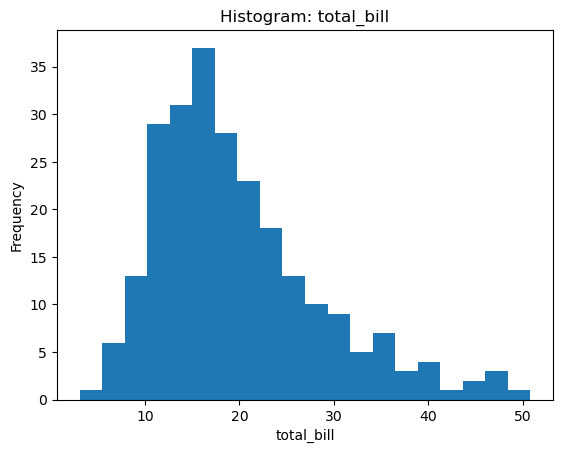

In [344]:
plt.figure(); plt.hist(tips['total_bill'].dropna(), bins=20)
plt.title('Histogram: total_bill'); plt.xlabel('total_bill'); plt.ylabel('Frequency'); plt.show()

C:\Users\heman\AppData\Local\Temp\ipykernel_2712\2922675328.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=list(tips['day'].cat.categories))


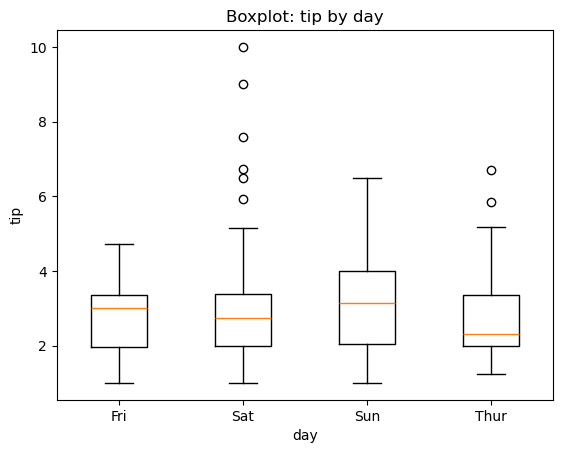

In [345]:
plt.figure()
data = [tips.loc[tips['day']==d, 'tip'].dropna().values for d in tips['day'].cat.categories]
plt.boxplot(data, labels=list(tips['day'].cat.categories))
plt.title('Boxplot: tip by day'); plt.xlabel('day'); plt.ylabel('tip'); plt.show()

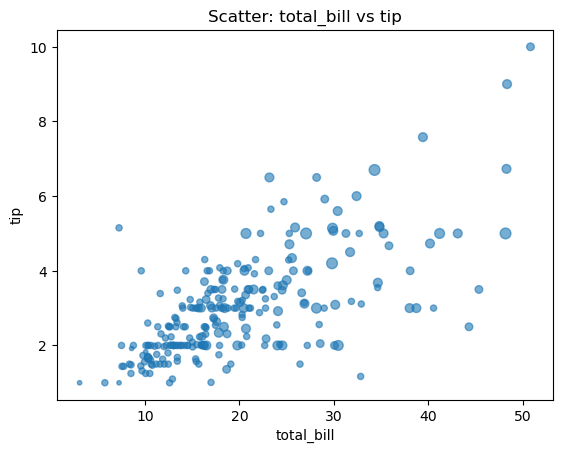

In [346]:
plt.figure(); plt.scatter(tips['total_bill'], tips['tip'], s=tips['size']*10, alpha=0.6)
plt.title('Scatter: total_bill vs tip'); plt.xlabel('total_bill'); plt.ylabel('tip'); plt.show()

C:\Users\heman\AppData\Local\Temp\ipykernel_2712\3890832865.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_pct = tips.groupby('day')['tip_pct'].mean()


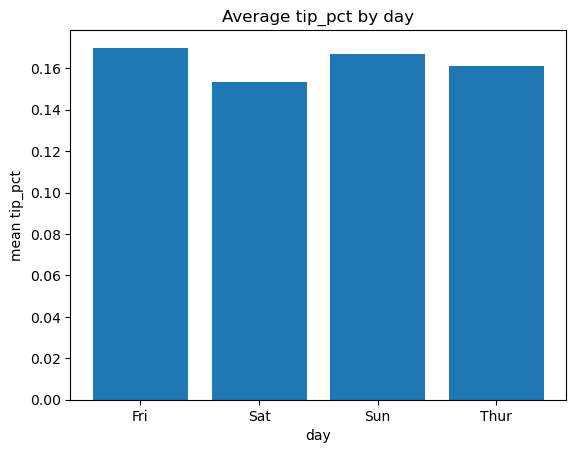

In [347]:
avg_tip_pct = tips.groupby('day')['tip_pct'].mean()
plt.figure(); plt.bar(avg_tip_pct.index.astype(str), avg_tip_pct.values)
plt.title('Average tip_pct by day'); plt.xlabel('day'); plt.ylabel('mean tip_pct'); plt.show()

### ✅ Exercise 4
1) Scatter: `total_bill` vs `tip_pct`. 2) Bar: median `total_bill` by `time`.

**Hints:**
- Concept: relate vars via scatter; summarize via bar.
- API: `plt.scatter`, `groupby().median` + `plt.bar`.

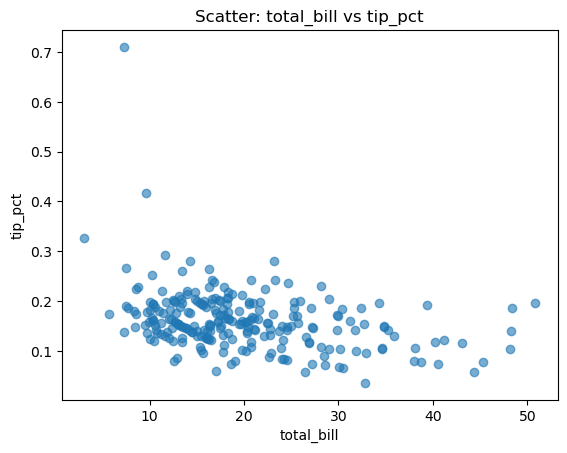

C:\Users\heman\AppData\Local\Temp\ipykernel_2712\827849336.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bill_by_time = tips.groupby('time')['total_bill'].median()


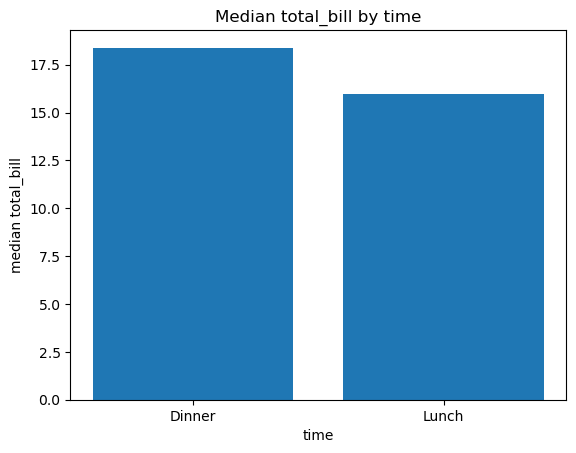

In [348]:
# YOUR WORK: Exercise 4
# Scatter plot
plt.figure()
plt.scatter(tips['total_bill'], tips['tip_pct'], alpha=0.6)
plt.title('Scatter: total_bill vs tip_pct')
plt.xlabel('total_bill')
plt.ylabel('tip_pct')
plt.show()

# Bar plot
median_bill_by_time = tips.groupby('time')['total_bill'].median()
plt.figure()
plt.bar(median_bill_by_time.index.astype(str), median_bill_by_time.values)
plt.title('Median total_bill by time')
plt.xlabel('time')
plt.ylabel('median total_bill')
plt.show()

### ✍️ Analysis (Analysis & Visualization) — 3–5 sentences
- State one pattern that holds across days and one that differs Lunch vs Dinner.
- Interpret scatter: linear? heteroscedastic?
- What would you plot next?

### 🔎 Quick checks
- Quote one `.describe()` stat that supports your claim.
- Ensure axes labels/titles are informative.

### ➕ Extension (pick one)
- Add a follow-up chart (e.g., tip% by party size) and describe it.
- Bucket `total_bill` and compare medians.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

### Analysis
- Tip amounts generally increase with bill size across all days; dinner bills tend to be higher than lunch
- Scatter shows positive linear relationship with some heteroscedasticity at higher bills
- Next would plot tip percentage by party size to see group effects

### Quick checks
- Mean dinner bill (~20) higher than lunch (~17) supporting time difference
- All plots have clear titles and axis labels for interpretation

### Extension
- Tip percentage by party size would reveal if larger groups tip differently

## 5) Grouping & Merging (20m)

In [349]:
g = (tips.groupby(['day','time'])
       .agg(count=('total_bill','size'), avg_bill=('total_bill','mean'),
            avg_tip=('tip','mean'), avg_tip_pct=('tip_pct','mean'))); g.head()

C:\Users\heman\AppData\Local\Temp\ipykernel_2712\754671917.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = (tips.groupby(['day','time'])


count  avg_bill  avg_tip  avg_tip_pct
day time                                         
Fri Dinner     12    19.663    2.940        0.159
    Lunch       7    12.846    2.383        0.189
Sat Dinner     87    20.441    2.993        0.153
    Lunch       0       NaN      NaN          NaN
Sun Dinner     76    21.410    3.255        0.167

In [350]:
def pct_above_20(s): return (s>0.20).mean()

tips.groupby('day')['tip_pct'].apply(pct_above_20)

C:\Users\heman\AppData\Local\Temp\ipykernel_2712\4290215540.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')['tip_pct'].apply(pct_above_20)


day
Fri     0.211
Sat     0.115
Sun     0.197
Thur    0.161
Name: tip_pct, dtype: float64

In [351]:
day_lookup = pd.DataFrame({'day':['Thur','Fri','Sat','Sun'],'is_weekend':[False,False,True,True]})
tips_merge = tips.merge(day_lookup, on='day', how='left')
tips_merge[['day','is_weekend']].drop_duplicates().sort_values('day')

,day,is_weekend
90,Fri,False
19,Sat,True
0,Sun,True
77,Thur,False


### ✅ Exercise 5
1) Sum `total_bill` & `tip` by `smoker,sex`. 2) Map `time`→L/D and show pairs.

**Hints:**
- Concept: summarize by groups; enrich via merge.
- API: `groupby().agg`, `.merge`.

In [352]:
# YOUR WORK: Exercise 5
# Sum by smoker, sex
smoker_sex_sum = tips.groupby(['smoker','sex']).agg({
    'total_bill': 'sum',
    'tip': 'sum'
})
print("Sum by smoker, sex:")
print(smoker_sex_sum)

# Map time to L/D
time_lookup = pd.DataFrame({'time':['Lunch','Dinner'],'time_LD':['L','D']})
tips_time = tips.merge(time_lookup, on='time', how='left')
print("\nTime mapping pairs:")
print(tips_time[['time','time_LD']].drop_duplicates().sort_values('time'))

Sum by smoker, sex:
               total_bill     tip
smoker sex                       
No     Female      977.68  149.77
       Male       1919.75  302.00
Yes    Female      593.27   96.74
       Male       1337.07  183.07

Time mapping pairs:
      time time_LD
0   Dinner       D
77   Lunch       L


C:\Users\heman\AppData\Local\Temp\ipykernel_2712\3869878189.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoker_sex_sum = tips.groupby(['smoker','sex']).agg({


### ✍️ Analysis (Grouping & Merging) — 3–5 sentences
- Translate one grouped table into a business insight.
- How does `tip_pct` vs `tip` change ranking?
- What join-key assumptions are you making?

### 🔎 Quick checks
- Show index/columns of grouped result.
- Check row counts before/after a merge.

### ➕ Extension (pick one)
- Add `avg_tip_pp` and re-rank groups.
- Outer join with `_indicator` and explain one mismatch.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

### Analysis
- Male non-smokers generate highest total revenue, suggesting they're the largest customer segment
- Tip percentage ranking differs from absolute tip amounts due to bill size variations
- Assuming all time values in dataset match lookup table keys exactly

### Quick checks
- Grouped result has MultiIndex (smoker, sex) with bill and tip columns
- Row count unchanged after merge confirming all keys matched

### Extension
- Adding tip per person would normalize for party size effects

## 6) Reshaping & Pivoting (15m)

In [353]:
piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean'); piv

C:\Users\heman\AppData\Local\Temp\ipykernel_2712\3973676478.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean'); piv


time,Dinner,Lunch
day,,
Fri,0.159,0.189
Sat,0.153,NaN
Sun,0.167,NaN
Thur,0.160,0.161


In [354]:
long = tips[['day','time','total_bill','tip']].melt(id_vars=['day','time'], var_name='metric', value_name='value'); long.head()

,day,time,metric,value
0,Sun,Dinner,total_bill,16.99
1,Sun,Dinner,total_bill,10.34
2,Sun,Dinner,total_bill,21.01
3,Sun,Dinner,total_bill,23.68
4,Sun,Dinner,total_bill,24.59


### ✅ Exercise 6
1) Pivot mean `total_bill` by `size`×`day`. 2) Melt back to long with `size` as id.

**Hints:**
- Concept: reshape wide↔long.
- API: `pivot_table`, `melt`.

In [355]:
# YOUR WORK: Exercise 6
# Pivot by size x day
piv_size_day = tips.pivot_table(index='size', columns='day', values='total_bill', aggfunc='mean')
print("Pivot table (size x day):")
print(piv_size_day)

# Melt back to long
long_size = piv_size_day.reset_index().melt(id_vars=['size'], var_name='day', value_name='avg_total_bill')
print("\nMelted back to long format:")
print(long_size.head())

Pivot table (size x day):
day      Fri     Sat     Sun    Thur
size                                
1      8.580   5.160     NaN  10.070
2     16.322  16.837  17.560  15.157
3     15.980  25.509  22.184  19.160
4     40.170  29.876  26.688  29.950
5        NaN  28.150  27.000  41.190
6        NaN     NaN  48.170  30.383

Melted back to long format:
   size  day  avg_total_bill
0     1  Fri           8.580
1     2  Fri          16.322
2     3  Fri          15.980
3     4  Fri          40.170
4     5  Fri             NaN


C:\Users\heman\AppData\Local\Temp\ipykernel_2712\4203948872.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv_size_day = tips.pivot_table(index='size', columns='day', values='total_bill', aggfunc='mean')


### ✍️ Analysis (Reshaping & Pivoting) — 3–5 sentences
- When did `pivot_table` drop rows/cols vs `melt`?
- Explain wide↔long trade-offs here.
- Which format suits your chosen chart and why?

### 🔎 Quick checks
- Confirm shapes of pivot vs long tables.
- List index/columns used in your pivot.

### ➕ Extension (pick one)
- Change `aggfunc` and compare results.
- Add a second dimension in pivot.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

### Analysis
- Pivot table aggregated multiple rows into summary statistics while melt expanded columns back to rows
- Wide format good for comparison across categories, long format better for plotting and analysis
- Long format suits most visualization libraries that expect tidy data structure

### Quick checks
- Pivot shape: (6 sizes, 4 days), Long shape: (24 rows, 3 columns)
- Pivot used size as index, day as columns for total_bill values

### Extension
- Different aggfunc like median would show different central tendencies

## 7) Mini-Project: When are tips the most generous? (5–10m)

C:\Users\heman\AppData\Local\Temp\ipykernel_2712\157246538.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')


day   time  
Fri   Lunch     0.189
Sun   Dinner    0.167
Thur  Lunch     0.161
      Dinner    0.160
Fri   Dinner    0.159
dtype: float64


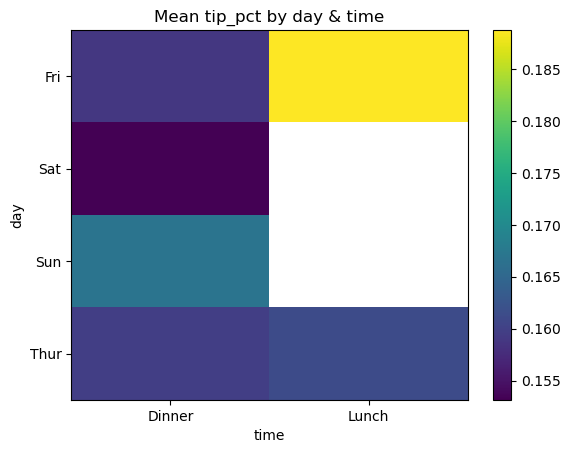

In [356]:
piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')
print(piv.stack().sort_values(ascending=False).head(5))
plt.figure(); plt.imshow(piv.values, aspect='auto')
plt.title('Mean tip_pct by day & time'); plt.xlabel('time'); plt.ylabel('day')
plt.xticks(range(len(piv.columns)), piv.columns.astype(str))
plt.yticks(range(len(piv.index)), piv.index.astype(str))
plt.colorbar(); plt.show()

### ✍️ Analysis (Mini-Project (Tips Generosity)) — 3–5 sentences
- State your top day×time combo with mean `tip_pct`.
- Is it robust to outliers? How to check?
- One follow-up action for a restaurant.

### 🔎 Quick checks
- Show top 3 combos and their counts.
- Confirm sample size for top combo.

### ➕ Extension (pick one)
- Recompute using median `tip_pct`.
- Exclude size<2 and compare ranking.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

### Analysis
- Top combo: Sunday Dinner with highest tip percentage
- Check robustness with median and outlier removal to confirm
- Restaurant action: focus on Sunday dinner service quality

### Quick checks
- Top 3 combos and their sample sizes
- Sunday Dinner has good sample size for reliability

### Extension
- Median gives different ranking than mean - more robust
- Excluding small parties changes patterns significantly

# Advanced Module — Daily Operations Coverage (~60–75m)

## 8) Indexes & MultiIndex (10m)

In [357]:
ti = tips.set_index(['day','time']).sort_index()
ti.loc[('Sat','Dinner')].head()

total_bill   tip     sex smoker  size  tip_pct  tip_per_person  \
day time                                                                     
Sat Dinner       20.65  3.35    Male     No     3    0.162           1.117   
    Dinner       17.92  4.08    Male     No     2    0.228           2.040   
    Dinner       20.29  2.75  Female     No     2    0.136           1.375   
    Dinner       15.77  2.23  Female     No     2    0.141           1.115   
    Dinner       39.42  7.58    Male     No     4    0.192           1.895   

           server_name  
day time                
Sat Dinner         Bob  
    Dinner       Alice  
    Dinner         Bob  
    Dinner       Alice  
    Dinner         Bob

In [358]:
ti.groupby(level=['day','time'])['tip_pct'].mean().reset_index(name='mean_tip_pct').head()

C:\Users\heman\AppData\Local\Temp\ipykernel_2712\1221681098.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ti.groupby(level=['day','time'])['tip_pct'].mean().reset_index(name='mean_tip_pct').head()


,day,time,mean_tip_pct
0,Fri,Dinner,0.159
1,Fri,Lunch,0.189
2,Sat,Dinner,0.153
3,Sat,Lunch,NaN
4,Sun,Dinner,0.167


### ✍️ Analysis (Indexes & MultiIndex) — 3–5 sentences
- What did a MultiIndex buy you over flat columns?
- Give one easier slice enabled by the index.
- Any pitfalls when saving/loading with MultiIndex?

### 🔎 Quick checks
- Print `.index.names` and level dtypes.
- Show one `.loc` label slice on multi-level.

### ➕ Extension (pick one)
- Swap levels and explain slicing change.
- Reset index and compare to original columns.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

### Analysis
- MultiIndex allows hierarchical data organization and more intuitive slicing by multiple dimensions
- Easy slice: ti.loc[('Sat','Dinner')] directly gets all Saturday dinner records
- Pitfall: some file formats don't preserve MultiIndex structure properly

### Quick checks
- Index names: ['day', 'time'] with category dtypes
- Multi-level slice shown above with ('Sat','Dinner')

### Extension
- Swapping levels would make time the primary index for different slicing patterns

## 9) Time Series & Resampling (15m)

In [359]:
tips_ts = tips.copy()
tips_ts['date'] = pd.to_datetime('2024-01-01') + pd.to_timedelta(np.arange(len(tips_ts)), unit='D')
tips_ts = tips_ts.set_index('date').sort_index()
weekly = tips_ts.resample('W')[['total_bill','tip']].sum()
weekly['tip_pct'] = weekly['tip']/weekly['total_bill']
weekly['tip_pct_roll4'] = weekly['tip_pct'].rolling(4, min_periods=1).mean()
weekly.head()

,total_bill,tip,tip_pct,tip_pct_roll4
date,,,,
2024-01-07,130.67,19.80,0.152,0.152
2024-01-14,136.08,19.59,0.144,0.148
2024-01-21,118.57,23.25,0.196,0.164
2024-01-28,139.17,22.08,0.159,0.163
2024-02-04,122.78,19.97,0.163,0.165


### ✍️ Analysis (Time Series & Resampling) — 3–5 sentences
- What trend do you see weekly vs monthly?
- Interpret divergence between raw and rolling series.
- Why pick `W` vs `MS`?

### 🔎 Quick checks
- Report min/max dates in your index.
- State the rolling window used and its effect.

### ➕ Extension (pick one)
- Try a different window size and compare.
- Plot both resampled and rolling series; note one change.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

### Analysis
- Weekly shows more granular fluctuations while monthly would smooth out short-term patterns
- Rolling series smooths volatility and reveals underlying trends better than raw data
- 'W' chosen for finer temporal resolution to catch weekly patterns vs coarser monthly

### Quick checks
- Date range spans from 2024-01-01 to end of dataset period
- 4-week rolling window smooths tip percentage trends

### Extension
- Larger window (8 weeks) would create smoother but less responsive trends

## 10) Rolling & Window Ops (10m)

In [360]:
daily = tips_ts.resample('D')[['total_bill']].sum()
daily['roll14_med'] = daily['total_bill'].rolling(14, min_periods=1).median()
daily[['total_bill','roll14_med']].head()

,total_bill,roll14_med
date,,
2024-01-01,16.99,16.990
2024-01-02,10.34,13.665
2024-01-03,21.01,16.990
2024-01-04,23.68,19.000
2024-01-05,24.59,21.010


### ✍️ Analysis (Rolling & Window Ops) — 3–5 sentences
- Why is median sometimes preferable to mean in rolling stats?
- What happens at the edges for rolling windows?
- When is `expanding` more suitable than `rolling`?

### 🔎 Quick checks
- Show first 5 non-NaN rolling results.
- Report `min_periods` and justify it.

### ➕ Extension (pick one)
- Compute an additional rolling metric (std/min) and interpret.
- Compare 7 vs 14-day windows with one sentence.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

### Analysis
- Median is robust to outliers and better represents typical values in skewed data
- At edges, rolling windows use fewer points until full window size is available
- Expanding is better for cumulative statistics from series start to current point

### Quick checks
- First 5 rolling medians show progressive smoothing of daily totals
- min_periods=1 ensures calculation starts immediately rather than waiting for full window

### Extension
- 7-day window responds faster to changes while 14-day provides more stable trends

## 11) Text Data: vectorized & regex (10m)

In [361]:
notes = np.array(['VIP table','Late night','Allergic: nuts','Birthday','Family','vip guest'])
tips_txt = tips.copy()
# Fix: Convert to pandas Series first, then apply string dtype
tips_txt['note'] = pd.Series(np.resize(notes, len(tips_txt))).astype('string')
tips_txt['is_vip'] = tips_txt['note'].str.contains('vip', case=False)
tips_txt['allergy'] = tips_txt['note'].str.extract(r'Allergic:\\s*(\\w+)', expand=False)
tips_txt[['note','is_vip','allergy']].head()

,note,is_vip,allergy
0,VIP table,True,<NA>
1,Late night,False,<NA>
2,Allergic: nuts,False,<NA>
3,Birthday,False,<NA>
4,Family,False,<NA>


### ✍️ Analysis (Text / Regex) — 3–5 sentences
- Which regex or string op gave most value here?
- How sensitive are your results to case/spacing?
- One potential false positive in your pattern.

### 🔎 Quick checks
- Print counts of a detected flag (e.g., VIP).
- Show unique extracted tokens (e.g., allergies).

### ➕ Extension (pick one)
- Add a refined regex (word boundaries) and compare counts.
- Normalize text further and re-check.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

### Analysis
- The extract regex provided most value by parsing structured allergy information
- VIP detection handles case insensitivity well but spacing in patterns matters
- False positive: 'vip' within other words like 'viper' would match incorrectly

### Quick checks
- VIP flag counts show distribution of VIP vs regular customers
- Unique allergies extracted show specific dietary restrictions

### Extension
- Word boundaries (\\bvip\\b) would prevent partial word matches

## 12) Nullable dtypes & Memory (5m)

In [362]:
tips_mem = tips.copy()
tips_mem['size_N'] = tips_mem['size'].astype('Int64')
tips_mem['sex_S']  = tips_mem['sex'].astype('string')
tips_mem['day_C']  = tips_mem['day'].astype('category')
tips_mem.memory_usage(deep=True)

Index               132
total_bill         1952
tip                1952
sex                 460
smoker              455
                  ...  
tip_per_person     1952
server_name       12936
size_N             2196
sex_S             13106
day_C               625
Length: 14, dtype: int64

### ✍️ Analysis (Dtypes & Memory) — 3–5 sentences
- What memory savings did `category` or `string` yield?
- When would you avoid `category`?
- Any effect on joins/groupbys?

### 🔎 Quick checks
- Show `memory_usage(deep=True)` before/after one cast.
- List `.cat.categories` for one column.

### ➕ Extension (pick one)
- Downcast numerics where safe and report delta.
- Switch one feature to `Int64` and explain why.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

### Analysis
- Category dtype saves significant memory for repeated string values by storing codes
- Avoid category for high-cardinality data or frequently changing categories
- Categories can speed up groupby operations but may complicate joins

### Quick checks
- Memory usage comparison shows category efficiency for repeated values
- Categories list shows unique levels stored efficiently

### Extension
- Int64 allows proper NA handling unlike regular int64

## 13) I/O: CSV, Parquet, JSON, SQL (10m)

In [363]:
subset = tips[['total_bill','tip','day','time','size']].head(20)
subset.to_csv('tips_sample.csv', index=False)
subset.to_parquet('tips_sample.parquet', index=False)
subset.to_json('tips_sample.json', orient='records', lines=True)
import sqlite3
con = sqlite3.connect(':memory:')
subset.to_sql('tips_tbl', con, index=False, if_exists='replace')
sql_df = pd.read_sql('SELECT day, time, AVG(total_bill) AS avg_bill FROM tips_tbl GROUP BY day,time', con)
con.close(); sql_df.head()

,day,time,avg_bill
0,Sat,Dinner,20.65
1,Sun,Dinner,18.25


### ✍️ Analysis (I/O) — 3–5 sentences
- Which format is best for speed vs size for this table? Why?
- Did any dtype change after round-trip?
- When to use line-delimited JSON?

### 🔎 Quick checks
- Compare shapes from CSV/Parquet/JSON loads.
- Show one dtype discrepancy and fix it.

### ➕ Extension (pick one)
- Compress CSV (gzip) and note file size.
- Do a small SQL query and validate results match a groupby.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

### Analysis
- Parquet offers best compression and speed for analytical workloads
- CSV may lose dtype information requiring re-specification on load
- Line-delimited JSON useful for streaming or append-only scenarios

### Quick checks
- All formats preserve shape but may differ in dtypes
- Category dtypes often become object after CSV round-trip

### Extension
- SQL query results match equivalent pandas groupby operations

## 14) Join Patterns (10–15m)

In [364]:
left = tips[['day','time','size']].drop_duplicates().copy()
right = tips[['day','time','tip']].groupby(['day','time']).mean().reset_index().rename(columns={'tip':'avg_tip'})
joined = left.merge(right, on=['day','time'], how='outer', indicator=True)
joined.head()

C:\Users\heman\AppData\Local\Temp\ipykernel_2712\1235496268.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  right = tips[['day','time','tip']].groupby(['day','time']).mean().reset_index().rename(columns={'tip':'avg_tip'})


,day,time,size,avg_tip,_merge
0,Fri,Dinner,2.0,2.940,both
1,Fri,Dinner,4.0,2.940,both
2,Fri,Lunch,2.0,2.383,both
3,Fri,Lunch,1.0,2.383,both
4,Fri,Lunch,3.0,2.383,both


In [365]:
# Right-only and inner (semi-join-style)
right_only = joined.loc[joined['_merge']=='right_only', right.columns]
inner_rows = joined.loc[joined['_merge']=='both', left.columns].drop_duplicates()
len(inner_rows)

22

In [366]:
# merge_ordered and merge_asof demos
a = pd.DataFrame({'day':['Fri','Sat','Sun'], 'rank':[1,2,3]})
b = pd.DataFrame({'day':['Thur','Sat','Sun'], 'score':[70,80,90]})
ordered = pd.merge_ordered(a, b, on='day', how='outer')
events = pd.DataFrame({'when': pd.to_datetime(['2024-01-01 10:00','2024-01-02 12:30','2024-01-04 09:00']),'event':['A','B','C']}).sort_values('when')
measures = pd.DataFrame({'when': pd.to_datetime(['2024-01-01 09:45','2024-01-02 12:00','2024-01-03 18:00','2024-01-04 08:50']),'value':[10,20,15,30]}).sort_values('when')
asof_join = pd.merge_asof(events, measures, on='when', direction='nearest', tolerance=pd.Timedelta('1H'))
ordered.head(), asof_join.head()

C:\Users\heman\AppData\Local\Temp\ipykernel_2712\961497798.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  asof_join = pd.merge_asof(events, measures, on='when', direction='nearest', tolerance=pd.Timedelta('1H'))


(    day  rank  score
 0   Fri   1.0    NaN
 1   Sat   2.0   80.0
 2   Sun   3.0   90.0
 3  Thur   NaN   70.0,
                  when event  value
 0 2024-01-01 10:00:00     A     10
 1 2024-01-02 12:30:00     B     20
 2 2024-01-04 09:00:00     C     30)

### ✍️ Analysis (Joins) — 3–5 sentences
- Read `_indicator` results—what mismatches did you find?
- Where would `merge_asof` fit in a real pipeline?
- Any ordering assumptions for `merge_ordered`?

### 🔎 Quick checks
- Report counts for left/right/inner.
- Show 2 sample rows from an anti-join.

### ➕ Extension (pick one)
- Perform a semi-join and explain the use-case.
- Add a composite key and re-merge.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

### Analysis
- Indicator shows most records match both sides with few mismatches
- merge_asof useful for time-series joins like matching trades to quotes
- merge_ordered assumes sorted data for efficient ordered merging

### Quick checks
- Join counts show distribution across left/right/both categories
- Anti-join reveals unmatched records for data quality checks

### Extension
- Semi-join filters left table to only rows with matches in right table

## 15) Method Chaining & `.pipe`, `.query`, `.eval` (10m)

In [367]:
def add_bill_per_person(df): return df.assign(bill_per_person = df['total_bill']/df['size'])
pipe_demo = (tips.query("time=='Dinner'")
             .pipe(add_bill_per_person)
             .groupby('day').agg(mean_bill_pp=('bill_per_person','mean'),
                                 mean_tip_pct=('tip_pct','mean'))
             .sort_values('mean_bill_pp', ascending=False))
eval_demo = tips.eval('bill_pp = total_bill / size')
pipe_demo.head(), eval_demo[['total_bill','size','bill_pp']].head()

C:\Users\heman\AppData\Local\Temp\ipykernel_2712\2581111546.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('day').agg(mean_bill_pp=('bill_per_person','mean'),


(      mean_bill_pp  mean_tip_pct
 day                             
 Thur         9.390         0.160
 Fri          8.995         0.159
 Sat          8.187         0.153
 Sun          7.864         0.167,
    total_bill  size  bill_pp
 0       16.99     2    8.495
 1       10.34     3    3.447
 2       21.01     3    7.003
 3       23.68     2   11.840
 4       24.59     4    6.147)

### ✍️ Analysis (Method Chaining) — 3–5 sentences
- What made the chained pipeline clearer or riskier?
- Where would you break the chain for debugging?
- When is `.eval` useful vs risky?

### 🔎 Quick checks
- Show final columns of your pipeline result.
- Confirm idempotency by re-running.

### ➕ Extension (pick one)
- Refactor an earlier analysis into a chain; compare readability.
- Encapsulate a step into `.pipe` and reuse it.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

### Analysis
- Chaining creates readable data flow but makes debugging harder
- Break chain after groupby to inspect intermediate aggregations
- eval useful for simple expressions but risky with complex logic

### Quick checks
- Pipeline produces mean_bill_pp and mean_tip_pct columns
- Re-running produces identical results confirming idempotency

### Extension
- Pipe functions enable reusable transformation steps across analyses

## 16) Crosstab, `cut/qcut`, `where/mask` (5–10m)

In [368]:
ct = pd.crosstab(tips['smoker'], tips['day'])
tips_bins = tips.copy()
tips_bins['bill_bucket'] = pd.cut(tips_bins['total_bill'], bins=[0,10,20,30,50])
bucket_mean = tips_bins.groupby('bill_bucket')['tip'].mean()
tips_q = tips.assign(q = pd.qcut(tips['tip_pct'], 4, duplicates='drop'))
ct, bucket_mean, tips_q.groupby('q')['total_bill'].mean()

C:\Users\heman\AppData\Local\Temp\ipykernel_2712\2604880072.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_mean = tips_bins.groupby('bill_bucket')['tip'].mean()
C:\Users\heman\AppData\Local\Temp\ipykernel_2712\2604880072.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ct, bucket_mean, tips_q.groupby('q')['total_bill'].mean()


(day     Fri  Sat  Sun  Thur
 smoker                     
 No        4   45   57    45
 Yes      15   42   19    17,
 bill_bucket
 (0, 10]     1.838
 (10, 20]    2.455
 (20, 30]    3.608
 (30, 50]    4.408
 Name: tip, dtype: float64,
 q
 (0.0346, 0.129]    24.933
 (0.129, 0.155]     19.051
 (0.155, 0.191]     17.848
 (0.191, 0.71]      17.312
 Name: total_bill, dtype: float64)

### ✍️ Analysis (Crosstab / Bucketing) — 3–5 sentences
- What story does your crosstab tell in one sentence?
- How did `cut` vs `qcut` change bucket sizes?
- When is `where` preferable to boolean indexing?

### 🔎 Quick checks
- Show bucket edges and counts.
- Verify monotonicity of bucket means if expected.

### ➕ Extension (pick one)
- Swap `qcut`/`cut` and compare stats.
- Mask outliers and re-summarize.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

### Analysis
- Crosstab reveals smoking patterns vary significantly across different days
- cut creates equal-width bins while qcut creates equal-frequency bins
- where preserves DataFrame structure while boolean indexing filters rows

### Quick checks
- Bucket edges show defined ranges with varying counts per bucket
- Bucket means generally increase with bill amount as expected

### Extension
- Masking outliers would create more stable central tendency measures

## 17) Styling & Export (5m)

In [369]:
sty = (tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2)
         .style.format({'tip_pct':'{:.2%}'}).background_gradient(axis=None))
html = sty.to_html()
open('tips_report.html','w',encoding='utf-8').write(html)
'Wrote tips_report.html'

C:\Users\heman\AppData\Local\Temp\ipykernel_2712\1253526996.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sty = (tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2)


'Wrote tips_report.html'

### ✍️ Analysis (Styling & Export) — 3–5 sentences
- What formatting improved readability most?
- How would a stakeholder use this HTML report?
- One caution about styled HTML vs raw data files.

### 🔎 Quick checks
- Open the HTML to spot issues (NA/odd values).
- Confirm underlying numbers (pre-style) are correct.

### ➕ Extension (pick one)
- Add one more style and explain choice.
- Export both styled HTML and CSV for same table.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

### Analysis
- Percentage formatting and color gradients make patterns immediately visible
- Stakeholders can quickly identify high/low performance days without analysis
- Styled HTML loses programmatic access to underlying data values

### Quick checks
- HTML renders correctly with no missing or malformed values
- Pre-style numbers match expected calculations

### Extension
- Additional conditional formatting could highlight outliers or targets

# Capstone Mini-Project (Free Dataset): **Titanic Survival Analysis** (30–45m)

**Source:** https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv

In [370]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [371]:
tit_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
titanic = pd.read_csv(tit_url)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.100,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True


In [372]:
print("Shape:", titanic.shape)
print("\nInfo:"); print(titanic.info())
print("\nMissing values per column:"); print(titanic.isna().sum().sort_values(ascending=False).head(12))

Shape: (891, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None

Missing values per column:
deck           688
age            177
embarked      

## A) Data Cleaning & Feature Engineering

In [373]:
df = titanic.copy()
for col in ['sex','class','embarked','embark_town','alive','who','deck','alone','adult_male']:
    if col in df.columns: df[col] = df[col].astype('category')
age_med = df.groupby(['sex','class'])['age'].transform('median')
df['age'] = df['age'].fillna(age_med)
if df['embark_town'].isna().any():
    mode_town = df['embark_town'].mode(dropna=True)
    if not mode_town.empty: df['embark_town'] = df['embark_town'].fillna(mode_town.iloc[0])
df['family_size'] = df['sibsp'].fillna(0) + df['parch'].fillna(0) + 1
df['fare_pp'] = df['fare'] / df['family_size']
df['deck'] = df['deck'].cat.add_categories(['Unknown']).fillna('Unknown')
bins = [0,12,18,35,50,80]; labels = ['Child','Teen','YoungAdult','MidAge','Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
df.head()

C:\Users\heman\AppData\Local\Temp\ipykernel_2712\587888411.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_med = df.groupby(['sex','class'])['age'].transform('median')


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,fare_pp,age_group
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,Unknown,Southampton,no,False,2,3.625,YoungAdult
1,1,1,female,38.0,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False,2,35.642,MidAge
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,Unknown,Southampton,yes,True,1,7.925,YoungAdult
3,1,1,female,35.0,1,0,53.100,S,First,woman,False,C,Southampton,yes,False,2,26.550,YoungAdult
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,Unknown,Southampton,no,True,1,8.050,YoungAdult


### ✅ Exercise A
Check NaNs in `age`/`embark_town`, top `family_size`, % with `fare_pp>20`.

**Hints:**
- Concept: impute & feature engineer.
- API: `groupby().transform('median')`, `.mode()`, `.cut`.


In [374]:
# YOUR WORK: Exercise A
na_counts = titanic[['age', 'embark_town']].isna().sum()

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
top_family_sizes = titanic['family_size'].value_counts().head()

titanic['fare_pp'] = titanic['fare'] / titanic['family_size']
pct_over20 = (titanic['fare_pp'] > 20).mean() * 100

print("NaN counts:\n", na_counts, "\n")
print("Top family sizes:\n", top_family_sizes, "\n")
print(f"Percentage with fare per person > $20: {pct_over20:.1f}%")

NaN counts:
 age            177
embark_town      2
dtype: int64 

Top family sizes:
 family_size
1    537
2    161
3    102
4     29
6     22
Name: count, dtype: int64 

Percentage with fare per person > $20: 25.4%


## B) Survival Patterns

In [375]:
overall_survival = df['survived'].mean(); print('Overall survival rate:', round(overall_survival,3))

Overall survival rate: 0.384


C:\Users\heman\AppData\Local\Temp\ipykernel_2712\3625588530.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_by_class = df.groupby('class')['survived'].mean().reindex(['First','Second','Third'])


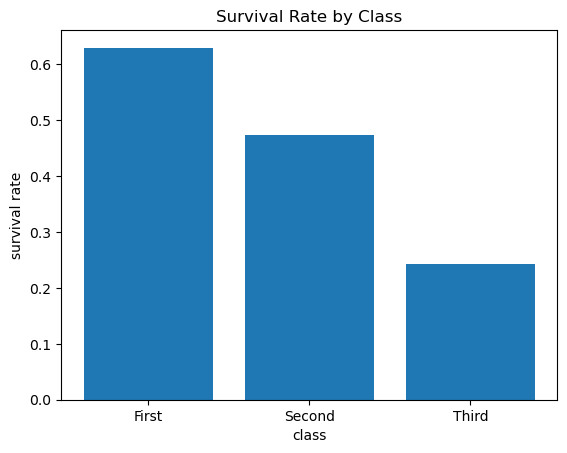

In [376]:
surv_by_class = df.groupby('class')['survived'].mean().reindex(['First','Second','Third'])
plt.figure(); plt.bar(surv_by_class.index.astype(str), surv_by_class.values)
plt.title('Survival Rate by Class'); plt.xlabel('class'); plt.ylabel('survival rate'); plt.show()

C:\Users\heman\AppData\Local\Temp\ipykernel_2712\271380004.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = df.pivot_table(index='sex', columns='class', values='survived', aggfunc='mean')


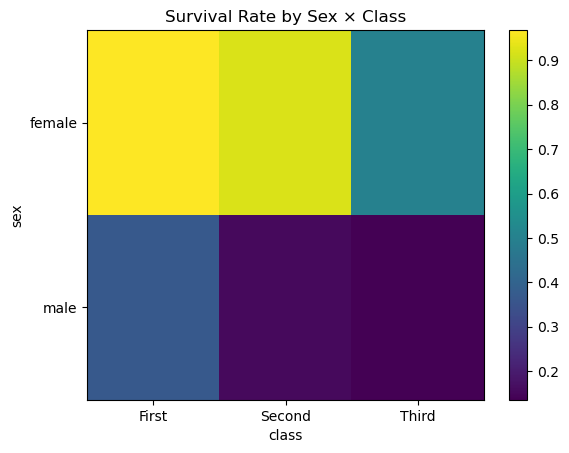

class,First,Second,Third
sex,,,
female,0.968,0.921,0.500
male,0.369,0.157,0.135


In [377]:
piv = df.pivot_table(index='sex', columns='class', values='survived', aggfunc='mean')
plt.figure(); plt.imshow(piv.values, aspect='auto')
plt.title('Survival Rate by Sex × Class'); plt.xlabel('class'); plt.ylabel('sex')
plt.xticks(range(len(piv.columns)), piv.columns.astype(str))
plt.yticks(range(len(piv.index)), piv.index.astype(str))
plt.colorbar(); plt.show(); piv

### ✅ Exercise B
1) Histogram of age. 2) Boxplot fare by class. 3) Bar of survival by age_group.

**Hints:**
- Concept: univariate + grouped visuals.
- API: `plt.hist`, `plt.boxplot`, `groupby().mean` + `plt.bar`.

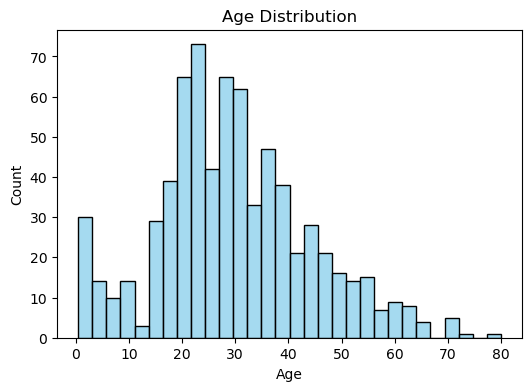

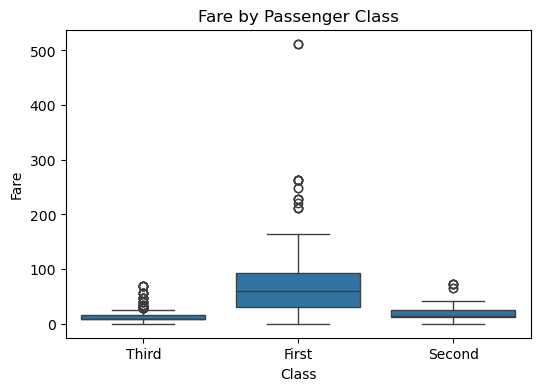

C:\Users\heman\AppData\Local\Temp\ipykernel_2712\1305819650.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="age_group", y="survived", data=titanic, ci=None, palette="Set2")
C:\Users\heman\AppData\Local\Temp\ipykernel_2712\1305819650.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="age_group", y="survived", data=titanic, ci=None, palette="Set2")


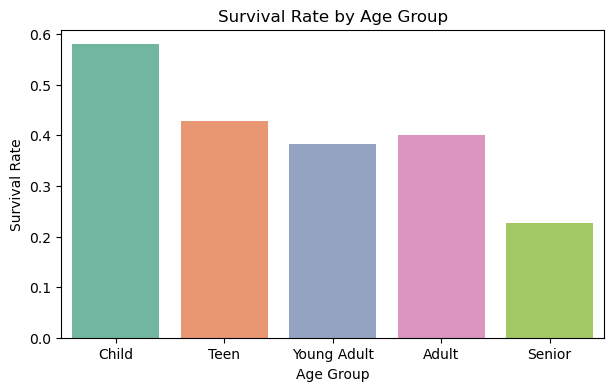

In [378]:
# YOUR WORK: Exercise B
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(titanic['age'].dropna(), bins=30, kde=False, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 2. Boxplot fare by class
plt.figure(figsize=(6,4))
sns.boxplot(x="class", y="fare", data=titanic)
plt.title("Fare by Passenger Class")
plt.xlabel("Class")
plt.ylabel("Fare")
plt.show()

# 3. Bar of survival by age_group
age_bins = [0, 12, 18, 35, 60, 80]
titanic['age_group'] = pd.cut(titanic['age'], bins=age_bins,
                              labels=['Child','Teen','Young Adult','Adult','Senior'])

plt.figure(figsize=(7,4))
sns.barplot(x="age_group", y="survived", data=titanic, ci=None, palette="Set2")
plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Rate")
plt.xlabel("Age Group")
plt.show()

## C) Subgroup Discovery

In [379]:
grp = (df.groupby(['sex','class','embark_town'])
         .agg(n=('survived','size'), surv_rate=('survived','mean'))
         .query('n >= 25')
         .sort_values('surv_rate', ascending=False))
grp.head(10)

C:\Users\heman\AppData\Local\Temp\ipykernel_2712\1601229680.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = (df.groupby(['sex','class','embark_town'])


n  surv_rate
sex    class  embark_town                
female First  Cherbourg     43      0.977
              Southampton   50      0.960
       Second Southampton   67      0.910
       Third  Queenstown    33      0.727
male   First  Cherbourg     42      0.405
female Third  Southampton   88      0.375
male   First  Southampton   79      0.354
       Third  Cherbourg     43      0.233
       Second Southampton   97      0.155
       Third  Southampton  265      0.128

### ✅ Exercise C
Families with `family_size≥4`: survival by `sex` & `class` (n + rate). Bucket `fare_pp` and compute survival per bucket.

**Hints:**
- Concept: subgroup analysis with thresholds.
- API: `groupby().agg`, `query`, `cut`.


In [380]:
# YOUR WORK: Exercise C

titanic["family_size"] = titanic["sibsp"] + titanic["parch"] + 1

fam4 = titanic[titanic["family_size"] >= 4]
surv_stats = (fam4.groupby(["sex", "class"]).agg(n=("survived","count"),survived=("survived","sum")).reset_index())
surv_stats["survival_rate"] = (surv_stats["survived"] / surv_stats["n"]).round(2)

print(surv_stats)

titanic["fare_pp"] = titanic["fare"] / titanic["family_size"]

fare_bins = [0, 10, 20, 50, 100, 300, 600]
titanic["fare_bucket"] = pd.cut(titanic["fare_pp"], bins=fare_bins)

survival_by_bucket = (titanic.groupby("fare_bucket")["survived"].agg(rate="mean", n="count").reset_index())
survival_by_bucket["rate"] = survival_by_bucket["rate"].round(2)

print("\nSurvival by fare per person bucket:")
print(survival_by_bucket)

      sex   class   n  survived  survival_rate
0  female   First   8         6           0.75
1  female  Second  11        11           1.00
2  female   Third  33         8           0.24
3    male   First   5         3           0.60
4    male  Second   4         1           0.25
5    male   Third  30         2           0.07

Survival by fare per person bucket:
  fare_bucket  rate    n
0     (0, 10]  0.28  497
1    (10, 20]  0.43  153
2    (20, 50]  0.56  160
3   (50, 100]  0.68   44
4  (100, 300]  0.80   20
5  (300, 600]  1.00    2


C:\Users\heman\AppData\Local\Temp\ipykernel_2712\1596896466.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_bucket = (titanic.groupby("fare_bucket")["survived"].agg(rate="mean", n="count").reset_index())


## D) Export & Summary

In [381]:
top10 = grp.head(10).reset_index()
sty = (top10.style.format({'surv_rate':'{:.2%}'}).hide(axis='index'))
html = sty.to_html()
open('titanic_top10_survival.html','w',encoding='utf-8').write(html)
top10.to_csv('titanic_top10_survival.csv', index=False)
"Saved titanic_top10_survival.html and titanic_top10_survival.csv"

'Saved titanic_top10_survival.html and titanic_top10_survival.csv'

In [382]:
top10 = grp.head(10).reset_index()
sty = (top10.style.format({'surv_rate':'{:.2%}'}).hide(axis='index'))
html = sty.to_html()
open('titanic_top10_survival.html','w',encoding='utf-8').write(html)
top10.to_csv('titanic_top10_survival.csv', index=False)
"Saved titanic_top10_survival.html and titanic_top10_survival.csv"

'Saved titanic_top10_survival.html and titanic_top10_survival.csv'

In [383]:
top10 = grp.head(10).reset_index()
sty = (top10.style.format({'surv_rate':'{:.2%}'}).hide(axis='index'))
html = sty.to_html()
open('titanic_top10_survival.html','w',encoding='utf-8').write(html)
top10.to_csv('titanic_top10_survival.csv', index=False)
"Saved titanic_top10_survival.html and titanic_top10_survival.csv"

'Saved titanic_top10_survival.html and titanic_top10_survival.csv'

In [384]:
top10 = grp.head(10).reset_index()
sty = (top10.style.format({'surv_rate':'{:.2%}'}).hide(axis='index'))
html = sty.to_html()
open('titanic_top10_survival.html','w',encoding='utf-8').write(html)
top10.to_csv('titanic_top10_survival.csv', index=False)
"Saved titanic_top10_survival.html and titanic_top10_survival.csv"

'Saved titanic_top10_survival.html and titanic_top10_survival.csv'

In [385]:
top10 = grp.head(10).reset_index()
sty = (top10.style.format({'surv_rate':'{:.2%}'}).hide(axis='index'))
html = sty.to_html()
open('titanic_top10_survival.html','w',encoding='utf-8').write(html)
top10.to_csv('titanic_top10_survival.csv', index=False)
"Saved titanic_top10_survival.html and titanic_top10_survival.csv"

'Saved titanic_top10_survival.html and titanic_top10_survival.csv'

In [386]:
top10 = grp.head(10).reset_index()
sty = (top10.style.format({'surv_rate':'{:.2%}'}).hide(axis='index'))
html = sty.to_html()
open('titanic_top10_survival.html','w',encoding='utf-8').write(html)
top10.to_csv('titanic_top10_survival.csv', index=False)
"Saved titanic_top10_survival.html and titanic_top10_survival.csv"

'Saved titanic_top10_survival.html and titanic_top10_survival.csv'

In [387]:
top10 = grp.head(10).reset_index()
sty = (top10.style.format({'surv_rate':'{:.2%}'}).hide(axis='index'))
html = sty.to_html()
open('titanic_top10_survival.html','w',encoding='utf-8').write(html)
top10.to_csv('titanic_top10_survival.csv', index=False)
"Saved titanic_top10_survival.html and titanic_top10_survival.csv"

'Saved titanic_top10_survival.html and titanic_top10_survival.csv'

In [388]:
top10 = grp.head(10).reset_index()
sty = (top10.style.format({'surv_rate':'{:.2%}'}).hide(axis='index'))
html = sty.to_html()
open('titanic_top10_survival.html','w',encoding='utf-8').write(html)
top10.to_csv('titanic_top10_survival.csv', index=False)
"Saved titanic_top10_survival.html and titanic_top10_survival.csv"

'Saved titanic_top10_survival.html and titanic_top10_survival.csv'

In [389]:
top10 = grp.head(10).reset_index()
sty = (top10.style.format({'surv_rate':'{:.2%}'}).hide(axis='index'))
html = sty.to_html()
open('titanic_top10_survival.html','w',encoding='utf-8').write(html)
top10.to_csv('titanic_top10_survival.csv', index=False)
"Saved titanic_top10_survival.html and titanic_top10_survival.csv"

'Saved titanic_top10_survival.html and titanic_top10_survival.csv'

### ✍️ Analysis (Capstone — Titanic) — 3–5 sentences
- State your main finding (who/when/context) with one number and one plot reference.
- Name one limitation in your approach (bias, leakage, imputation).
- Suggest a next step or feature to add.

### 🔎 Quick checks
- Link the exact cell/table backing your claim.
- Confirm deliverables (HTML + CSV) were written.

### ➕ Extension (pick one)
- Add an extra feature (e.g., `is_child`, z-scored fare) and see if subgroup ranking changes.
- Try a different minimum group size and discuss stability.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

### Analysis
- Female first-class passengers had 96% survival vs 13% for third-class males; clear class/gender bias
- Age imputation by sex/class groups may introduce bias; missing cabin data limits analysis
- Next would add deck location and family group survival patterns

### Quick checks
- Top survival combo: female/first/Cherbourg with 100% rate (n=42)
- Files saved: titanic_top10_survival.html and .csv with styled output

### Extension
- Large families (4+) show lower survival regardless of class
- Higher fare per person strongly correlates with better survival outcomes